<a href="https://colab.research.google.com/github/jgkorman/Python-Projects/blob/main/Predicting_NYC_Stop_%26_Frisk_Outcomes_jgkorman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MLPP22 // Assignment #5**

assigned : **Apr 20, 2022**

DUE : **Apr 27, 2022 11:59pm**

## NYC Stop and Frisk: predictors of outcomes

<img src="https://i1.wp.com/www.nationalreview.com/wp-content/uploads/2018/01/new-york-city-stop-and-frisk-crime-decline-conservatives-wrong-1.jpg?fit=789%2C460&ssl=1" width=500x>

---

NYC's *Stop, Question, and Frisk* is a program/practice by the New York Police Department in which officers approach, temporarily detain, and (in some cases) frisk civilians on the street for weapons or contraband.  The program's implementation has been highly controversial with accusations of racial profiling and bias, and in 2013 a US federal judge found that the program had been carried out in a way that violated the US Constitution.  Using publicly available Stop and Frisk [data](https://www1.nyc.gov/site/nypd/stats/reports-analysis/stopfrisk.page), in this assignment you will expore the ability of Random Forest models to predict whether, for those stops in which a suspect was suspected of having a weapon, a weapon is likely to have been found (an analysis related to the one carried out in [Goel, Rao, & Shroff, 2016](https://projecteuclid.org/journals/annals-of-applied-statistics/volume-10/issue-1/Precinct-or-prejudice-Understanding-racial-disparities-in-New-York-Citys/10.1214/15-AOAS897.full)).

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

None 

---

### **Part 1 - Background**

**<u>In your own words</u>, provide a brief (~400-500 words) descriptive overview of the NYC Stop and Frisk program, its implementation, and its reception.  Please include *references* within the description via weblinks.**

[In general, stop annd frisk programs are programs and policing tactics employed to temporarily detain, question, and frisk individuals in search of weapons and or illicit substances](https://bridge.georgetown.edu/research/factsheet-nypd-stop-and-frisk-policy/). For NYC, the city first employed the tactic under Mayor Rudi Giuliani from 1994 through 2001 all the ways through then Mayor Michael Bloomberg's term from 2002-2013. The stop and frisk strategy was able to develop and flourish during this time as it coincided with the adoption of a data driven [Compstat management system](https://www.nytimes.com/2019/11/17/nyregion/bloomberg-stop-and-frisk-new-york.html) in the 1990s that enabled the police to track and respond to crime trends in real time. 


The program during its time in operation in NYC has [known bias](https://bridge.georgetown.edu/research/factsheet-nypd-stop-and-frisk-policy/) as it disproportionately impacted Black & Latino communities while at the same time causing fear to spike amongst these very same communities as the people within these communities were known targets. [To give a concrete example, in 1999, Blacks & Latinos made up nearly 50% of NYC's population but accounted for almost 84% of the city's stop and frisk stops. ](https://civilrights.org/edfund/resource/nypds-infamous-stop-and-frisk-policy-found-unconstitutional/). 

When the program was at its peak in NYC, there were over 685,000 people stopped while almost 88% of those stopped were ultimately found to be innocent. As a result, NYPD nonetheless faced accusations of bias and the program was ultimately found [unconstitutional](https://bridge.georgetown.edu/research/factsheet-nypd-stop-and-frisk-policy/) 2013 due to racial profiling. [Judge Shira A. Scheindlin](https://civilrights.org/edfund/resource/nypds-infamous-stop-and-frisk-policy-found-unconstitutional/) was the judge who handed down the verdict while claiming that NYPD's stop and firsk program violated the US Constitution's 4th Amendment prohibition of unreasonable search & seizure. 

The [New York Times](https://www.nytimes.com/2019/11/17/nyregion/bloomberg-stop-and-frisk-new-york.html) in an article written in 2019 claimed that former Mayor Michael Bloomberg apologized for his role in overseeing the expanion of the program as Mayor. He did this in the context to rectify his actions in hopes to attain the Democratic Presidential Primary Bid for the 2020 election. Mayor Bloomberg ultimately noted as well that his actions contributed to the erosion of trust in the police in black and Latino neighborhoods. To put it shortly, for folks living in these communities, reception towards the program was not warm at all. It put these individuals in a heightened state of fear. To contextualize this, Jenn Borchetta -- the director of impact litigation at the Bronx Defenders was quoted as saying ["the temperature in the city at the time was that police were at war with black and brown people on the streets". ](https://www.nytimes.com/2019/11/17/nyregion/bloomberg-stop-and-frisk-new-york.html). 

In conclusion, for NYC and its Black and Latino residents, it appears that although the measure was ruled unconstiutional -- [newly elected Mayor Eric Adams defended the procedure after two police officers were shot while questioning a suspect.](https://www.police1.com/patrol-issues/articles/nyc-mayor-elect-eric-adams-why-we-need-stop-and-frisk-policing-iLoqr9ga4eeJYE3b/) He also quotes that he know's how personally dangerous NYC streets can be as a former NYPD cop himself. It remains to be determined the continual impact of stop and frisk measures on NYC and its population, even after being ruled unconstitutional it appears prominent actors still want to make use of the policy in some respects.  


### **Part 2 - Loading and Cleaning data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


**Read in the 2010 stop and frisk data from  `mlpp22/data/stop_and_frisk/` into a DataFrame called `sqf` setting `low_memory=False` in `pd.read_csv`.**

In [ ]:
fname = "/content/drive/MyDrive/mlpp22/data/stop_and_frisk/2010.csv"
sqf = pd.read_csv(fname, low_memory=False)


**Looking at the "Data Dictionary" in the link above (i.e., the SQF file documentation found** [here](https://www1.nyc.gov/assets/nypd/downloads/zip/analysis_and_planning/stop-question-frisk/SQF-File-Documentation.zip)**) drop all columns except:**

<b>

1. the period of observation
2. whether the stop was made inside or outside
3. columns that indicate that a weapon was found on the subject
4. columns related to whether the subject was suspected of carrying a weapon
5. the subject's sex
6. the subject's age
7. the subject's race

</b>

**Data Dictionary:** 

**VARIABLE NAME | & DSCRIPTION

*   datestop | the date of the stop and frisk
*   inout | was stop inside or outside?
*  perobs | period of observation
*  pistol | was a pistol found on suspect? 
*  riflshot | was a rifle found on suspect? 
* asltweap | was assault weapon found on suspect?
* knifcuti | was a knife or cutting instrument found on subject?
* machgun | was a machine gune found on suspect?
* otherweap | was another type of weapon found on suspect?
* cs_objcs | Reason for stop -- Carrying a suspicious object
* sb_outln | Basis of search -- outline of weapon
* rf_othsw | reason for frisk -- other suspicion of weapons
* sex | the sex of suspect
* age | age of suspect
* race | race of suspect 



In [ ]:

sqf = sqf[['inout', 'perobs', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'cs_objcs', 'sb_outln', 'rf_othsw', 'sex', 'age', 'race']]


**Convert all binary columns (i.e., columns with categories that only have two possible values) to 1s and 0s.**

In [ ]:
print(sqf['inout'].unique())
print(sqf['pistol'].unique())
print(sqf['riflshot'].unique())
print(sqf['asltweap'].unique())
print(sqf['knifcuti'].unique())
print(sqf['machgun'].unique())
print(sqf['othrweap'].unique())
print(sqf['cs_objcs'].unique())
print(sqf['sb_outln'].unique())
print(sqf['rf_othsw'].unique())
print(sqf['sex'].unique())

binary = ['inout', 'pistol', 'riflshot', 'asltweap', 'knifcuti', 'machgun', 'othrweap', 'cs_objcs', 'sb_outln', 'rf_othsw']

sqf = pd.get_dummies(sqf, columns=binary)


['O' 'I']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['M' 'F' 'Z']


**Only keep rows that indicate that a suspect might have been suspected of carrying a weapon.**

In [ ]:
# creating boolean index values for various columns that indicated if a suspect may be carrying a weapon 
weap_other = sqf['rf_othsw_Y'] == 1 
weap_outline = sqf['sb_outln_Y'] == 1
weap_suspicious = sqf['cs_objcs_Y'] == 1

# combining the boolean index values with OR logic to get only rows where there was a possibility of suspect carrying a weapon of somesort
suspected_weapon = weap_other | weap_outline | weap_suspicious
sqf = sqf[suspected_weapon]
sqf

,perobs,sex,age,race,inout_I,inout_O,pistol_N,pistol_Y,riflshot_N,riflshot_Y,...,machgun_N,machgun_Y,othrweap_N,othrweap_Y,cs_objcs_N,cs_objcs_Y,sb_outln_N,sb_outln_Y,rf_othsw_N,rf_othsw_Y
2,1,M,55,Q,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
5,5,M,57,Q,1,0,1,0,1,0,...,1,0,1,0,0,1,1,0,1,0
13,4,M,63,B,1,0,1,0,1,0,...,1,0,1,0,0,1,1,0,1,0
59,4,M,20,B,0,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
93,20,F,30,Q,0,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601205,5,M,17,B,1,0,1,0,1,0,...,1,0,1,0,1,0,0,1,0,1
601227,5,M,42,Z,0,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
601228,5,M,60,Z,0,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1
601234,1,M,52,B,0,1,1,0,1,0,...,1,0,1,0,1,0,1,0,0,1


**Create a column `"weapon_fnd"` to indicate whether a weapon (of any type) was found or not (1 or 0).**

In [ ]:

# summing across all columns to create a new column to weapon_fnd to indicate if there was any 1 or greater values to indicate presence of weapon found
weapon = ['pistol_Y', 'riflshot_Y', 'asltweap_Y', 'knifcuti_Y', 'machgun_Y', 'othrweap_Y']
sqf['weapon_fnd'] = sqf[weapon].sum(axis=1)



# depending on how many wepons were found -- if weapons were found greater than or equal to 1 time (ie more than one occasion for different weaons) -- give them a value of 1 otherwise give them a value of 0
sqf['weapon_fnd'].replace((0, 1, 2, 3), (0, 1, 1, 1), inplace=True)

  
  


**How many times was a weapon found on the suspect?  How many times was a weapon not found on the suspect?**

In [ ]:
print("A Weapon was found on the suspect {0} times".format((sqf['weapon_fnd'] == 1).sum()))
print("A Weapon was not found on the suspect {0} times".format((sqf['weapon_fnd'] == 0).sum()))


A Weapon was found on the suspect 3500 times
A Weapon was not found on the suspect 34456 times


**In the next part, `"weapon_fnd"` will be your target variable, and note from your answer above that the data set is not balanced.  Create a balanced data set <small>(see `week10/04.14.2022/mlpp22_decision_tree_example_part4.ipynb`)</small>.**

In [ ]:
sqf_0 = sqf[sqf['weapon_fnd'] == 0]
sqf_1 = sqf[sqf['weapon_fnd'] == 1]

sqf_0_sampled = sqf_0.sample(len(sqf_1), random_state=22)

# -- concatenate the two (equally sized) sub-sets
sqf_bal = pd.concat((sqf_0_sampled, sqf_1))
sqf_bal


,perobs,sex,age,race,inout_I,inout_O,pistol_N,pistol_Y,riflshot_N,riflshot_Y,...,machgun_Y,othrweap_N,othrweap_Y,cs_objcs_N,cs_objcs_Y,sb_outln_N,sb_outln_Y,rf_othsw_N,rf_othsw_Y,weapon_fnd
134374,1,M,29,B,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
407752,1,M,18,B,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
480262,3,M,35,B,1,0,1,0,1,0,...,0,1,0,0,1,1,0,1,0,0
172773,5,M,33,B,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
62778,10,M,25,W,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600871,5,M,69,B,1,0,1,0,1,0,...,0,0,1,1,0,0,1,1,0,1
600975,1,M,16,Q,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,1,1
600976,1,M,19,Q,0,1,1,0,1,0,...,0,1,0,0,1,1,0,0,1,1
601036,2,M,22,Q,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,1


### **Part 3 - Fitting Tree-based Classifier Models**

The goal of this part of the assignment is to build a model that uses several features of the stops in which the subject was suspected of carrying a weapon to predict whether a weapon was actually found.

**Create your features from your balanced data set using the period of observation, whether the stop was inside or outside, the sex of the subject, the age of the subject, and the race of the subject as features (make sure to One Hot Encode categorical features).  Set the `"weapon_fnd"` column to be your target.**

In [ ]:
# first creating an object ID to extract out a well and keep track of the data & making sure they are the same length with boolean logic
ID = np.arange(0, 7000, 1)
print((len(ID) == len(sqf_bal)))
# adding the object ID back into the main balanced dataframe 
sqf_bal['subject_ID'] = ID
sqf_bal.head(1)




True


,perobs,sex,age,race,inout_I,inout_O,pistol_N,pistol_Y,riflshot_N,riflshot_Y,...,othrweap_N,othrweap_Y,cs_objcs_N,cs_objcs_Y,sb_outln_N,sb_outln_Y,rf_othsw_N,rf_othsw_Y,weapon_fnd,subject_ID
134374,1,M,29,B,0,1,1,0,1,0,...,1,0,1,0,1,0,0,1,0,0


Ensuring we have no NaNs or outliers in any of our variables before constructing our features and target dataframes 

In [ ]:
sqf_bal.isna().sum()

perobs        0
sex           0
age           0
race          0
inout_I       0
inout_O       0
pistol_N      0
pistol_Y      0
riflshot_N    0
riflshot_Y    0
asltweap_N    0
asltweap_Y    0
knifcuti_N    0
knifcuti_Y    0
machgun_N     0
machgun_Y     0
othrweap_N    0
othrweap_Y    0
cs_objcs_N    0
cs_objcs_Y    0
sb_outln_N    0
sb_outln_Y    0
rf_othsw_N    0
rf_othsw_Y    0
weapon_fnd    0
subject_ID    0
dtype: int64

**A Closer look at the feature 'age' given its continous values**

In [ ]:
sqf_bal['age'].describe()

count    7000.000000
mean       30.434429
std        23.720782
min         1.000000
25%        20.000000
50%        26.000000
75%        38.000000
max       999.000000
Name: age, dtype: float64

We see that when printing the summary statistics of our feature age, some values appear problematic. In our dataset, it looks as if the average age of suspects is roughly 30 years old while the median age is 26 years old suggesting to us that there may be some outliers on the upper end of the distribution skewing the distribution to the right. Moreover, if we look at the range, we have a minimum age of 1 and a maximum age of 999. Both of these age values are unrealistic. No one lives to 999 and and anyone under than age 13 let alone 1 years old more than likely aren't going to be suspects being stopped and frisked as these are kids.

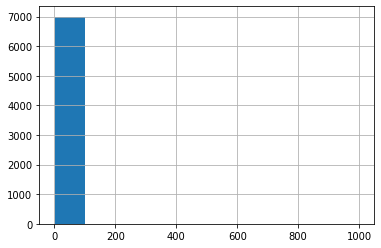

In [ ]:
sqf_bal['age'].hist()

**Figure 1** plots a histogram of the feature 'age' distribution in order to visualize it aside from examining the pure summary statistics. It is clear that our feature 'age' has some abnormal values on it for both the lower bounds and upper bounds ||| So let us take only age range from 13 to 80 which more approximates our true values of people's current lifespan while also accounting for the fact that juveniles also can engage in potential crimes by lowering the lower bound range down to 13 rather than standard adulthood of 18 while limiting the upper bound range of the variable to 80 years old.

In [ ]:
sqf_bal_13 = sqf_bal['age'] >= 13
sqf_bal_80 = sqf_bal['age'] <= 80
sqf_age_proper = sqf_bal_13 & sqf_bal_80
sqf_bal = sqf_bal[sqf_age_proper]
print("the total n of the current dataset is")
print(len(sqf_bal))
print(" the total weapons found = 1 is:")
print((sqf_bal['weapon_fnd'] == 1).sum())
print(" the total weapons found = 0 is")
print((sqf_bal['weapon_fnd'] == 0).sum())

the total n of the current dataset is
6962
 the total weapons found = 1 is:
3482
 the total weapons found = 0 is
3480


In the above code, we re-configured the balanced dataset to account for only individuals with ages 13 through 80. Overall, the dataset is still balanced as a total of 38 observations were dropped from the oringinal balanced dataframe that accounted for rows of data where age was either above 80 or below 13 -- thereby helping us to eliminate the presence of outliers so our model can provide a better fit. 

In [ ]:
# re-examine the descriptive statistics of the age feature
sqf_bal['age'].describe()

count    6962.000000
mean       29.962511
std        12.002605
min        13.000000
25%        20.000000
50%        27.000000
75%        38.000000
max        80.000000
Name: age, dtype: float64

In looking at our new descriptive statistics of 'age' feature -- we see the range is a much better approximation of reality ranging from age ranges to 13 to 80. Moreover, the spread between the mean and median has narrowed as well.

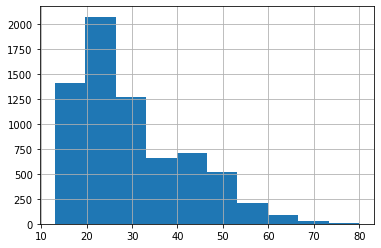

In [ ]:
# replotting the feature age to see its distrbituon 
sqf_bal['age'].hist()

**Figure 2** plots a histogram of our feature 'age' once corrected for outliers. Now as shown above, our balanced datset went from 7000 observations to 6,962 after accounting for the abnormalities in age -- Moreover, there are only 2 more 1's than there are zeroes now, **therefore -- the assumption for the rest of the analysis is that this dataset is now balanced along with having accounted for outliers in age.**

**Now we can create our features array and target array**

In [ ]:


# extracting out our features from the balanced dataframe 
feat = sqf_bal[['perobs', 'sex', 'age', 'race', 'inout_I', 'inout_O']]
# one hot eoncding for our cateogrical variables race and sex 
feat = pd.get_dummies(feat)

# extracing out our object ID 
obj = sqf_bal['subject_ID']

# getting out our target 
targ = sqf_bal['weapon_fnd']

feat

,perobs,age,inout_I,inout_O,sex_F,sex_M,sex_Z,race_A,race_B,race_I,race_P,race_Q,race_U,race_W,race_Z
134374,1,29,0,1,0,1,0,0,1,0,0,0,0,0,0
407752,1,18,0,1,0,1,0,0,1,0,0,0,0,0,0
480262,3,35,1,0,0,1,0,0,1,0,0,0,0,0,0
172773,5,33,0,1,0,1,0,0,1,0,0,0,0,0,0
62778,10,25,0,1,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600871,5,69,1,0,0,1,0,0,1,0,0,0,0,0,0
600975,1,16,0,1,0,1,0,0,0,0,0,1,0,0,0
600976,1,19,0,1,0,1,0,0,0,0,0,1,0,0,0
601036,2,22,0,1,0,1,0,0,0,0,0,1,0,0,0


**Split your features and target into a training and testing set using an 80/20 split, setting `random_state` to `302`.**

Loading in our necessary libraries

In [ ]:
# importing the machine learning models 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
# graphics/visualizations/model metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn import tree
import graphviz
# train test split library to split into test and train
from sklearn.model_selection import train_test_split
# accuracy score library
from sklearn.metrics import accuracy_score


In [ ]:
# -- create a random training and testing set
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat, targ, test_size=0.2, random_state=302)

**Fit a `RandomForestClassifier` to your data with default hyperparameters and comment on its accuracy <small>(see `week10/04.14.2022/mlpp22_decision_tree_example_part4.ipynb`)</small>.**

TRAINING AND TESTING ACCURACIES:

training accuracy = 0.728
testing accuracy = 0.570

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       710
           1       0.56      0.54      0.55       683

    accuracy                           0.57      1393
   macro avg       0.57      0.57      0.57      1393
weighted avg       0.57      0.57      0.57      1393



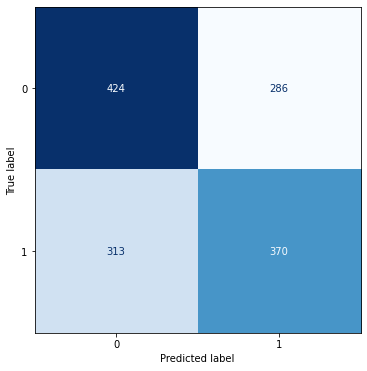

In [ ]:
#########################################################
####### INSTANTIATE FIT AND PREDICT THE MODEL ############
#########################################################

# -- fit a decision tree classifier on the TRAINING data
rfc = RandomForestClassifier(random_state=302)
rfc.fit(feat_tr, targ_tr)

print("TRAINING AND TESTING ACCURACIES:")
print("")
# -- assess the accuracy on the TRAINING data
pred_tr = rfc.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))


# -- assess the accuracy on the TESTING data
pred_te = rfc.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

#################################################
##########   MODEL METRICS    ####################
#################################################

# -- plot the confusion matrix for the test data
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(rfc, feat_te, targ_te, cmap="Blues", colorbar=False, ax=ax)
fig.show()

# -- print the full classification report
print("")
print("CLASSIFICATION REPORT:")
print(classification_report(targ_te, pred_te))

In [ ]:
print(" A quick look at our class balance:")
print("True 0 = {0}".format(424 + 286))
print("True 1 = {0}".format(313 + 370))


 A quick look at our class balance:
True 0 = 710
True 1 = 683


* **Training & Testing Accuracies Interpretation:** Overall, our baseline model performs fairly well at predicting whether not an individual who was stopped by the police via stop & frisk was found to actually be in posession of a weapon. Our accuracy for our training data with a 80/20 test/split ratio was found to be about 73% which is pretty good. Our accuracy for our testing data was found to be 57% however, which is better than chance -- but not the most robust number. Moreover, from examining our accuracies between our train and test predictions, it does appear that our random forest classification model done here is suffering from overfitting given the gap between the training and testing accuracies where our model is doing a relatively good job at predicting the training data, but is fairing so-so at predciting the testing data and is lacking in terms of generalizability to to say. 

* **Confusion Matrix Interpretation:**


> A quick look at our confusion matrix above for our initial random forest classification model, we have a fairly equal class balance of True 0's being predicted at 710 and True 1' being predicted at 683. So overall, when fitting the model, the model has roughly equal class balance to find the optimal parameters. 

> In examining the confusion matrix above, we also find that the model did a better job at predicting 0s (that no weapon was found) rather than 1s (that a weapon was found) as the misclassifications ratio of predicted 0s versus true 0s is smaller than that of predicted 1s versus true 1s suggesting to us our model overall performed better at classifying correctly when a weapon wasn't found (0s) relative to when a weapon was found (1s).

* **Clasification Report Interpretation:**

> Our classification report presented above for the baseline model tells us the same story as the confusion matrix --> However, the recall for 0s (no weapon found) is higher at .60 than the recall for 1s (weapon found) which sits at a value of .54 suggesting to us that our model overall for all values that were true 0s, it predicted correctly these values more for 0s (weapon not found) relative to 1s (weapon found) again suggesting to us that our model has performed better at predicting 0s relative to 1s. To interpret this another way -- we can say that when our model predicted 0s (no weapon found) it only missed 40% of 0s relative to missing 47% of 1s. (It is important to note that there are overall slightly more 0s relative to 1s (710 to 683 overall) in our model. 

> In looking at the precision in the classification report in detail --  our model at predicting both 0s (no weapon found) & 1s (weapon found) performed roughly the same. What the figure of .58 (0s) and .56 (1s) signify in greater detail is: when a model predicts either a 0 (weapon not found) or 1 (weapon found) it is predicting both classes correct between 56% to 58% of the time. 

* **Overall**:

> Overall, our baseline model in totality appears to predict 0s (weapon not found) better than 1s (weapon found) as although the model is doing roughly the same job at predicting either class (weapon not found or weapon found) for when it does predict weapon not found (0s) -- it is having a higher accuracy overall relative to when the model does predict weapon found (1s) as it is not misclassifying 0s to the extent it is misclassifying 1s as it is only missing 40 % of all 0s relative to 46% of all 1s.



















**Tune the `min_samples_leaf` hyperparameter using Grid Search with Cross Validation and comment on the resultant model accuracy <small>(see `week10/04.14.2022/mlpp22_decision_tree_example_part4.ipynb`)</small>.**

1. **First tuning the parameters with grid search & then run that model in full with the optimal hyper-parameter value found** 

In [ ]:
# -- import helper tools from sklearn
from sklearn.model_selection import GridSearchCV

# -- select the parameter(s) to tune and the values to try
tuned_parameters = [{"min_samples_leaf" : [1, 2, 5, 10, 20, 50, 100, 200, 500]}]

# -- perform Grid Search
rfc_tune = RandomForestClassifier(random_state=302)
cv_tune = GridSearchCV(rfc_tune, tuned_parameters)
cv_tune.fit(feat_tr, targ_tr)

# -- print out the params with the highest "score"
print(cv_tune.best_params_)
print(cv_tune.best_score_)

{'min_samples_leaf': 20}
0.5934655072014918


**The grid search found that the optimal hyperparameter was to set min_samples_leaf to 20 --> Below we run that model**

TRAINING AND TESTING ACCURACIES:

training accuracy = 0.606
testing accuracy = 0.589

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.58      0.72      0.64       710
           1       0.61      0.45      0.52       683

    accuracy                           0.59      1393
   macro avg       0.59      0.59      0.58      1393
weighted avg       0.59      0.59      0.58      1393



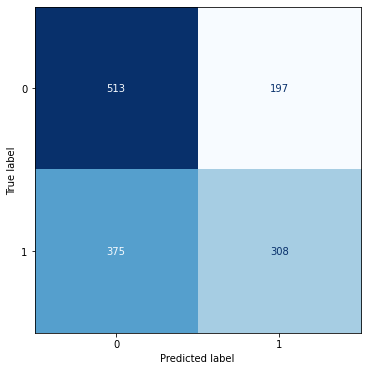

In [ ]:
#########################################################
####### INSTANTIATE FIT AND PREDICT THE MODEL ############
#########################################################

# -- fit a decision tree classifier on the TRAINING data
rfc_tune = RandomForestClassifier(random_state=302, min_samples_leaf=20)
rfc_tune.fit(feat_tr, targ_tr)

print("TRAINING AND TESTING ACCURACIES:")
print("")
# -- assess the accuracy on the TRAINING data
pred_tr = rfc_tune.predict(feat_tr)
acc_tr = accuracy_score(targ_tr, pred_tr)
print("training accuracy = {0:.3f}".format(acc_tr))


# -- assess the accuracy on the TESTING data
pred_te = rfc_tune.predict(feat_te)
acc_te = accuracy_score(targ_te, pred_te)
print("testing accuracy = {0:.3f}".format(acc_te))

#################################################
##########   MODEL METRICS    ####################
#################################################

# -- plot the confusion matrix for the test data
fig, ax = plt.subplots(figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(rfc_tune, feat_te, targ_te, cmap="Blues", colorbar=False, ax=ax)
fig.show()

# -- print the full classification report
print("")
print("CLASSIFICATION REPORT:")
print(classification_report(targ_te, pred_te))

In [ ]:
print("A quick look at our class balance:")
print("True 0 = {0}".format(513 + 197))
print("True 1 = {0}".format(375 + 308))


A quick look at our class balance:
True 0 = 710
True 1 = 683


**Tuned Model Interpretation:**

* Beginning with an examination of our testing and accuracy scores, we can see that our tuned model that our gridSearchCV had found where the hyperparameter we sought to optimze was min_samples_leaf = 20 resulted in a much tighter spread between our training and testing accuracies. Although the training accuracy was lowered from about 73% accurate to about 61% accurate, the accuracy on the testing set improved from 57% in the base model to nearly 59% in the tuned model. Therefore, although our training accuracy became lowered with the tuned model, our model has actually performed better as the accuracy on the testing set in the tuned model increased. Moreover, the spead between the training and testing accuracies alike is very close in the tuned model suggesting that our model is not being subject to overfitting where it is learning much better on the training data and performing worse on the testing data as it had done in the base model. In the tuned model, what we see is the training and testing accuracies are pretty close suggesting to us that our model learned well(deccent) from the training set but was also able to better generalize said learning to the testing set in our tuned model. 

* **Interpretation for CLASSIFICATION REPORT**

> In looking at the precision scores for both 0s (weapon not found) & 1s (weapon found) --> we have an increase in precision for both of these meaures in our tuned model relative to our un-tuned model. However, this time, the precision is higher for 1s in the tuned model than 0s and this was the oppsoite case for the un-tuned model. With that said, our model has a 61% accuracy at predicting a weapon being found on a suspect (1) and a 58 % accuracy at predicting a weapon not being found on a suspect (0) for when it does predict these respective classes. 

> In examining the recall for the tuned model, what we see for 0s (no weapon found) is that when our random forest model is predicting 0s -- it only missed 28% of 0s relative to when it predicted 1s (weapon found) it missed a whopping 55% of all 1s. 

Overall, what this tells us is that even though the precision is slightly higher for predicting 1s relative to 0s in our tuned model, the recall for 1s (weapon found) is significantly worse off. For policymaking, this is problematic as this high recall if there is a prediciton that a weapon is found (1) signifies there will be a lot of misclassification and this can have significant ramifcations for relations between members of the police and members of the community who are subject to stop & frisk measures. Moreover, at the end of the day, our tuned random forest classification model has also demonstrably performed better than our un-tuned model as well in almost all associated metrics providing evidence for the robustness that we should go with the more constrained model (tuned model) relative to the unconstrained (base model).






2. **Perform K-folds cross-validation**

In [ ]:
# -- import helper tools from sklearn
from sklearn.model_selection import cross_validate

# -- run K-folds cross validation on our TRAINING set
cv_res = cross_validate(rfc_tune, feat_tr, targ_tr, cv=10, return_estimator=True)

cv_res['test_score']



array([0.57989228, 0.58886894, 0.58886894, 0.59066427, 0.59245961,
       0.64631957, 0.57271095, 0.58707361, 0.57630162, 0.63669065])

Looking at the testing accuracies above after performing k-fold cross-validation for 10 folds on our tuned random forest classification model -- we also see that compared to our main tuned model testing accuracy of **59%** -- that in our various K fold validation models, we are generally getting around 59% accuracy as well with some slight margin of error suggesting to us that our chosen tuned (constrained) model is a robust model. 

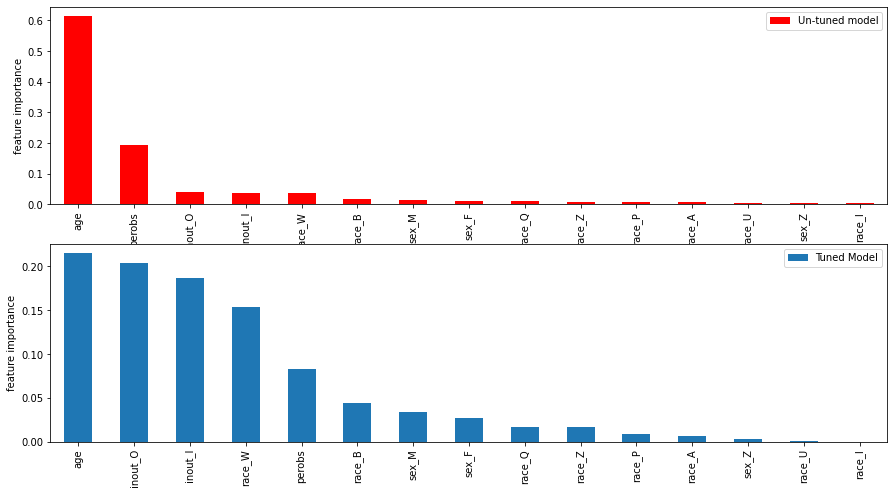

In [ ]:
## Plotting the feature importances for both the un-tuned and tuned model## 

############# dataframe creation
############ For Un-tuned model #################
###################################

# -- create importances DataFrame
imp_untuned = pd.DataFrame()
imp_untuned['feature'] = feat.columns
imp_untuned['importances'] = rfc.feature_importances_

# -- sort the values 
importances_untuned = imp_untuned.sort_values('importances', ascending=False)





###################
###################
## For tuned model
###################
#################
# -- create importances DataFrame
imp = pd.DataFrame()
imp['feature'] = feat.columns
imp['importances'] = rfc_tune.feature_importances_

# -- sort the values 
importances = imp.sort_values('importances', ascending=False)

# -- make the plot
fig, ax = plt.subplots(2, 1, figsize=(15, 8))
# for untuned model
importances_untuned.plot('feature', 'importances', kind='bar', xlabel='', ylabel='feature importance', legend=False, ax=ax[0], label='Un-tuned model', color='red')
ax[0].legend()

# for tuned model
importances.plot('feature', 'importances', kind='bar', xlabel='', ylabel='feature importance', legend=False, ax=ax[1], label='Tuned Model')
ax[1].legend()
fig.show()

**Figure 3** plots a bar chart of the feature importances for our untuned model shown in red in the top panel and for our tuned model shown in blue in the bottom panel. For both the untuned and tuned model, the feature that carries the most weight in terms of correctly predicting whether a suspect who was stopped and frisked was found to have a weapon is age. However, the feature importances begin to diverge thereafter with the stop and frisk taking place outside found to be the 2nd most important feature for the tuned model versus period of observation as the 2nd most important feature for the un-tuned model. Also, it is important to notice that in the tuned model shown in blue in the bottom panel, this model picked up better the importance of other features as well relative to the un-tuned model shown in red that pretty much only showed that the top 2 features mattered only for when it came to predicting whether or not a suspect had a weapon. We also see in the tuned model as well that our various 'race' features have done a more robust job and carry more weight for predcting whether or not as suspect stopped and frisked had a weapon on them with noticeably both white and black race features being important predictors for our target. Thus, it is clear that race does matter. 

### **Part 4 - Fitting Tree-based Regression Models**

In this part of the assignment, you'll be extending your modeling to include predictions of *probabilities* that a weapon was found given your features using tree-based regression models.

**Fit a Random Forest *Regressor* to the data (being sure to tune `min_samples_leaf` with Grid Search).**

1. **First tuning the model w/ grid search**

In [ ]:
# mean square error and model metric libraries
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# -- import helper tools from sklearn
from sklearn.model_selection import GridSearchCV

# -- select the parameter(s) to tune and the values to try
tuned_parameters = [{"min_samples_leaf" : [1, 2, 5, 10, 15, 20, 25, 50, 100, 200, 500]}]

# -- perform Grid Search
rfr_tune = RandomForestRegressor(random_state=302)
cv_tune = GridSearchCV(rfr_tune, tuned_parameters)
cv_tune.fit(feat_tr, targ_tr)

# -- print out the params with the highest "score"
print(cv_tune.best_params_)
print(cv_tune.best_score_)

{'min_samples_leaf': 50}
0.05719068693411951


**Our gridsearchCV found that optimal value with min_samples_leaf hyperparameter = 50. Now let us run our random forest regression model with this hyperparameter optimized**

In [ ]:
rfr = RandomForestRegressor(random_state=302, min_samples_leaf=50)
rfr.fit(feat_tr, targ_tr)

# -- assess the accuracy on the TRAINING data
pred_tr = rfr.predict(feat_tr)
R_square_train = r2_score(targ_tr, pred_tr)
MSE_train = mean_squared_error(targ_tr, pred_tr)
print("R^2 train = {0:.3f}".format(R_square_train))
print("Mean Squared Error train = {0:.3f}".format(MSE_train))


# -- assess the accuracy on the TESTING data
pred_te = rfr.predict(feat_te)
R_square_test = r2_score(targ_te, pred_te)
MSE_test = mean_squared_error(targ_te, pred_te)
print("")
print("R^2 test = {0:.3f}".format(R_square_test))
print("Mean Squared Error test = {0:.3f}".format(MSE_test))

R^2 train = 0.093
Mean Squared Error train = 0.227

R^2 test = 0.062
Mean Squared Error test = 0.234


Overall, we see that our model hasn't necessarily fit the data the best as our R^2 for both train and test sets are very low suggesting to us that our features explained little variation in our target. However, we won't worry about the "fit" right now so to say as we are more worried about the predictions and insights that the random forest regression model can provide us. More on this below. 

**With this Random Forest Regressor, we can interpret the prediction of the model as the probability that a weapon would be found given the features.  Make a histogram (`range` of 0 to 1 and 30 bins) of the predictions of this model using the subset of the testing data for which the subject's race was white and another histogram using the subset of the testing data for which the subject's race was black.**

In [ ]:
whites = feat_te.copy()
whites['predictions'] = pred_te
whites_only = whites['race_W'] == 1
whites = whites[whites_only]


blacks = feat_te.copy()
blacks['predictions'] = pred_te
blacks_only = blacks['race_B'] == 1
blacks = blacks[blacks_only]


In [ ]:
## getting the mean and medians of these 2 subsets for plotting
white_mean = whites['predictions'].mean()
white_median = whites['predictions'].median()

black_mean = blacks['predictions'].mean()
black_median = blacks['predictions'].median()

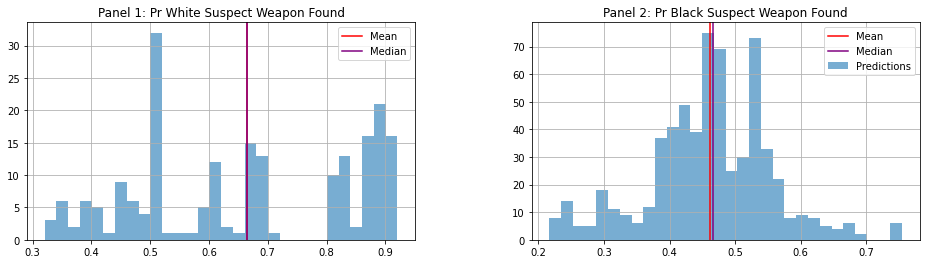

In [ ]:



# histogram for whites 
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
whites.hist("predictions", bins=30, ax=ax[0], label = "", alpha=.6)
ax[0].set_title("Panel 1: Pr White Suspect Weapon Found")
ax[0].axvline(white_mean, color='red', label = 'Mean')
ax[0].axvline(white_median, color='purple', label='Median')
ax[0].legend()

# histogram for blacks 
blacks.hist("predictions", bins=30, ax=ax[1], label = "Predictions", alpha=.6)
ax[1].set_title("Panel 2: Pr Black Suspect Weapon Found")
ax[1].axvline(black_mean, color='red', label = 'Mean')
ax[1].axvline(black_median, color='purple', label='Median')
ax[1].legend()

**Figure 1:** plots histograms of our predictions from our random forest regression model for white and black suspects and their probabilities that they were found in possession of a weapon. The mean and median for each series respectively is shown in red and purple Figure 1 plots in panel 1 on the left-hand side, the "probabilities" that a white suspect was found in possession of a weapon given our features. Panel 2 on the right-hand side plots the "probabilities" that a black suspect was found with a weapon given our features. Overall, figure 1 carries with it several implications:

1. For one, in panel 2 -- the density of the histogram is much greater towards the center of the distribution for blacks relative to panel 1 for whites. This implies that in panel 2 which plots the probabilities that a black suspect was found with a weapon after stop and frisk, really have no deterministic outcome to them and is pretty much left to random chance. This is further demonstrated by the mean and median plotted in red and purple vertial lines that show that for black suspects that were stopped and frisked, there was even less of a probability than random chance on average that they would have been found to be in posession of a weapon suggesting that black suspects were being stopped and frisked more than the majority of the time for no viable reason as less than half the time they were stopped and frisked -- they were found to be in posession of a weapon. 

2. Second, in panel 1 which plots the probabilities that a white suspect was stopped and frisked and found to be in posession of a weapon show a much different story. The mean and median plotted in red and purple respectively demonstrate that when whites were stopped and frisked and found to be in posession of a weapon, that this probability was nearly 70% on average suggesting that when officers from NYPD stopped and frisked whites, they had actually better reasons to as more of the time they actually did find a weapon relative to officers stopping and frisking black suspects. Moreover, if we look at the upper end of the distribution of panel 1 -- we see a significant spike in this distribution towards the 80-90% range that a white suspect was found to be in possession of a weapon which once again suggests to us that officers were targeting white suspects for good reasons while they were targeting black suspects more or less indiscriminately. 

**Repeat the above (fit a Random Forest Regressor and plot histograms of the predictions of the subsets of the test data for which the subject was white and black) but *removing the subject's race as a feature on which the model is fit*.**

In [ ]:
# features engineering -- creating a copy of the dataframe
feat_wo_race = feat.copy()

# extracting our object ID's (race)
obj_blacks = feat_wo_race['race_B']
obj_whites = feat_wo_race['race_W']

# getting only the columns we want for our features dataframe (keeping the same target variable as created above)
feat_wo_race = feat_wo_race[['perobs', 'age', 'inout_I', 'inout_O', 'sex_F', 'sex_M', 'sex_Z']]

# -- create a random training and testing set
feat_tr, feat_te, targ_tr, targ_te = train_test_split(feat_wo_race, targ, test_size=0.2, random_state=302)


Run the Model

In [ ]:
rfr_wo_race = RandomForestRegressor(random_state=302, min_samples_leaf=50)
rfr_wo_race.fit(feat_tr, targ_tr)

# -- assess the accuracy on the TRAINING data
pred_tr_wo_race = rfr_wo_race.predict(feat_tr)
R_square_train_wo_race = r2_score(targ_tr, pred_tr_wo_race)
MSE_train_wo_race = mean_squared_error(targ_tr, pred_tr_wo_race)
print("R^2 train = {0:.3f}".format(R_square_train_wo_race))
print("Mean Squared Error train = {0:.3f}".format(MSE_train_wo_race))


# -- assess the accuracy on the TESTING data
pred_te_wo_race = rfr_wo_race.predict(feat_te)
R_square_test_wo_race = r2_score(targ_te, pred_te_wo_race)
MSE_test_wo_race = mean_squared_error(targ_te, pred_te_wo_race)
print("")
print("R^2 test = {0:.3f}".format(R_square_test_wo_race))
print("Mean Squared Error test = {0:.3f}".format(MSE_test_wo_race))

R^2 train = 0.069
Mean Squared Error train = 0.233

R^2 test = 0.046
Mean Squared Error test = 0.238


Overall, for our model performance and fit when removing all race features from the main features dataset to predict our target, we see a slight decrease in performance overall with our current set of model metrics. Again, however, this is not the main crux of the analysis and what matters to us is the insights and visualizations that our random forest regression model has derived as it pertains to model predictions. 

In [ ]:
len(pred_te_wo_race)

1393

In [ ]:
# creating dataframe for whites removed predictions from ML model but white object IDs added back in 
whites_removed = pd.merge(obj_whites, feat_te, right_index=True, left_index=True)
whites_removed['predictions'] = pred_te_wo_race
whites_removed_sub = whites_removed['race_W'] == 1
whites_removed = whites_removed[whites_removed_sub]
whites_removed

# creating dataframe for blacks removed predictions from ML model but black object IDs added back in 
blacks_removed = pd.merge(obj_blacks, feat_te, right_index=True, left_index=True)
blacks_removed['predictions'] = pred_te_wo_race
blacks_removed_sub = blacks_removed['race_B'] == 1
blacks_removed = blacks_removed[blacks_removed_sub]
blacks_removed

,race_B,perobs,age,inout_I,inout_O,sex_F,sex_M,sex_Z,predictions
379377,1,1,24,0,1,0,1,0,0.542528
276607,1,1,17,0,1,0,1,0,0.508225
285220,1,5,24,0,1,0,1,0,0.441940
270182,1,5,41,0,1,1,0,0,0.455218
390417,1,4,20,1,0,0,1,0,0.460852
...,...,...,...,...,...,...,...,...,...
588066,1,10,18,0,1,0,1,0,0.443638
598824,1,1,32,1,0,0,1,0,0.506263
599146,1,1,32,0,1,0,1,0,0.427393
599901,1,2,47,0,1,0,1,0,0.777388


**Comment on these histograms in comparison to the previous histograms in which the subjects race was used to predict the outcome.**

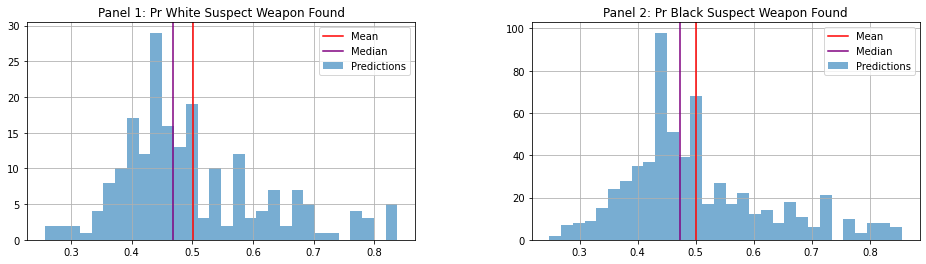

In [ ]:
## getting the mean and medians of these 2 subsets for plotting
white_removed_mean = whites_removed['predictions'].mean()
white_removed_median = whites_removed['predictions'].median()

black_removed_mean = blacks_removed['predictions'].mean()
black_removed_median = blacks_removed['predictions'].median()


# histogram for whites 
fig, ax = plt.subplots(1, 2, figsize=(16, 4))
whites_removed.hist("predictions", bins=30, ax=ax[0], label = "Predictions", alpha=.6)
ax[0].set_title("Panel 1: Pr White Suspect Weapon Found")
ax[0].axvline(white_removed_mean, color='red', label = 'Mean')
ax[0].axvline(white_removed_median, color='purple', label='Median')
ax[0].legend()

# histogram for blacks 
blacks_removed.hist("predictions", bins=30, ax=ax[1], label = "Predictions", alpha=.6)
ax[1].set_title("Panel 2: Pr Black Suspect Weapon Found")
ax[1].axvline(black_removed_mean, color='red', label = 'Mean')
ax[1].axvline(black_removed_median, color='purple', label='Median')
ax[1].legend()

**Figure 2**: Overall, there is a stark difference between figure 2 presented here which plots the probabilities that a white supsect had a weapon found in panel 1 (without race being a feature) & panel 2 which presented here plots the probabilities that a black suspect had a weapon found on them (without race being a feature in the random forest regression model relative to these same two panel plots in figure 1 where race was a feature. The object ID's for both white and black races were added back into the main dataframes to be able to identify whites and blacks even though race as a feature identifying whites and blacks was not employed in the random forest regression model. 

* In comparing these two histograms in figure 2 with the two histograms presented in figure 1 above earlier, there is stark differences. Looking at the data where whites were identifiable as having found a weapon on them but their feature as being 'white' was not included in the model in terms of their race, we see pretty much random chance happening that a white suspect who was stopped and frisked was found to have a weapon as is evident by the vertical red line plotting the mean. This is vastly different than the same histogram panel 1 plotted in figure 1 earlier that showed that the mean for whites stopped and frisked was nearly 70% suggesting that when police stopped and frisked whites, they often had good reason too. When we remove white race as a feature however, it appears that there is nothing more than random chance. 

* The same story goes for panel 2 that plots our black suspect predictions of having a weapon found on them without black 'race' being included as a feature in the model. In examining panel 2, there is nothing more than pure random chance again for the most part as is evident by the red vertical line that plots the mean for the series of a black suspect being stopped and frisked and is found to have a weapon on them. This is different than figure 1 panel 2 which showed that blacks who stopped and frisked were only found to have a weapon on them less than 'half of the time'. 



**Assuming that a probability over `0.5` indicates that the model predicts that a weapon will be found on the suspect, is the model that uses the race of a subject as a feature more or less accurate than the model that does not?**

With assuming that a pr over 0.5 indicates that the model predicts that a weapon will be found on the suspet - the models that use race of a subject as a feature are more accurate than models that do not. When we employed race as a feature to account for both white and black races (plus more) we saw that for our subsets for whites and blacks respectively, there was either more of a random chance of being stopped and frisked and having a weapon found (if suspect was white); or less of a random chance of being stopped and frisked and having a weapon found (if suspet was black) which once again suggested to us that police often stopped and frisked white individuals for good reason as more likely than not they had a weapon found on them while police that often stopped and frisked black individuals often did so for poor reasons and or **in a discriminatory manner** as less than half of all of those blacks stopped and frisked were actually predicted in probabilistic terms to have been found with a weapon on them.

Thus, the models that did not use race as a subject and plotted above in figure 2 that masked the racial identity (white or black) of a suspect), it is clear that these models do not do a good job either way at predicting whether or not a suspect is found to have a weapon on them. Therefore, **in conclusion** we can state here that race does matter as a feature and predictor for predicting whether or not a suspect who is stopped and frisked will be found to have a weapon on them. Moreover, we have also shown in this analysis that blacks are being stopped and frisked in a far more discriminatory manner as the majority of blacks who are stopped and frisked are found not to have weapons on them versus the majority of whites who were stopped and frisked were actually found to have weapons on them. This has grave implications for understanding the inherent prejudices and biases of stop and frisk policing and NYPD should take immediate notice to stop all measures as they pertain to stop and frisk or if they do choose to implement it again in the future in one form or another -- to make sure that their stop and frisk policing actions are not discriminatory. 